# Statistics for Data Science with Python (Project Submission)

## Lawrence Dallas, 7th January 2022

In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import math
import statsmodels.api as sm

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df = pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### For the "Median value of owner-occupied homes" provide a boxplot

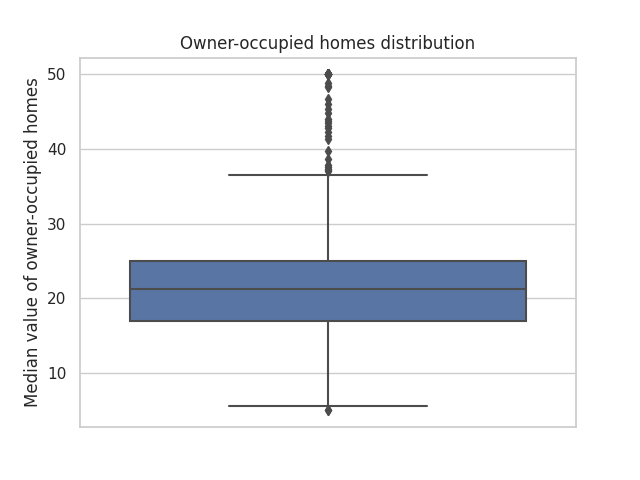

In [27]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Owner-occupied homes distribution')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

### Provide a  bar plot for the Charles river variable

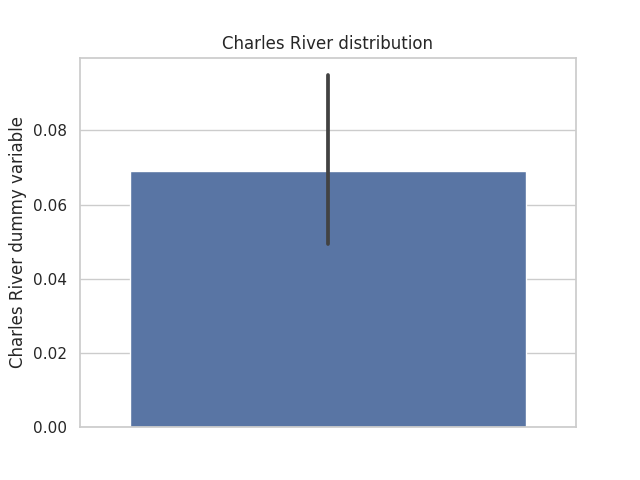

In [30]:
ax = sns.barplot(y="CHAS", data=boston_df)
plt.title('Charles River distribution')
plt.ylabel('Charles River dummy variable')
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [55]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

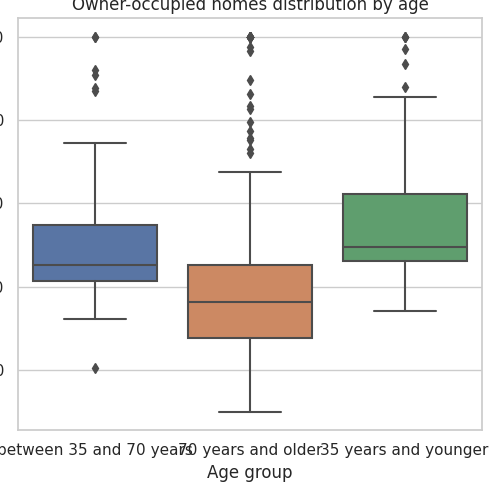

In [59]:
ax = sns.boxplot(x = 'age_group', y='MEDV', data=boston_df)
plt.title('Owner-occupied homes distribution by age')
plt.xlabel('Age group')
plt.ylabel('Median value of owner-occupied homes')
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

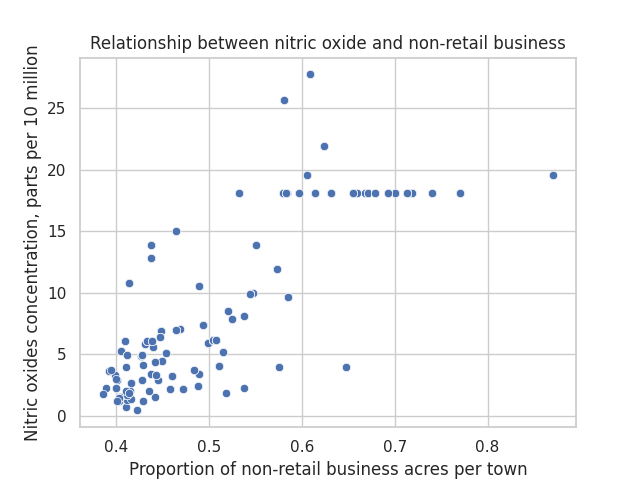

In [42]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between nitric oxide and non-retail business')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxides concentration, parts per 10 million')
plt.show()

### Create a histogram for the pupil to teacher ratio variable

<ipython-input-45-f2bbdb226255>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


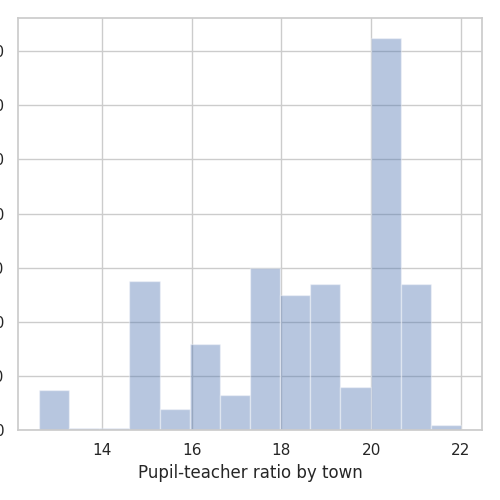

In [45]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Count')
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values of houses bound by the Charles River or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median values of houses bound by the Charles River or not")

α = 0.05

In [51]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we cannot assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398285)

In [81]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses bound by the Charles River and houses not bound by the Charles River.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

α = 0.05

In [60]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [61]:
thirty_five_lower_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_five_seventy_MEDV = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_higher_MEDV = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [62]:
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower_MEDV, thirty_five_seventy_MEDV, seventy_higher_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations are  correlated with proportion of non-retail business acres per town

α = 0.05

In [63]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  nitric oxide concentrations and proportion of non-retail business acres per town.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

α = 0.05

In [65]:
lin_res = scipy.stats.linregress(boston_df['DIS'], boston_df['MEDV'])

In [66]:
print(f"R-squared: {lin_res.rvalue**2:.6f}")

R-squared: 0.062464


In [82]:
print(f"Correlation Coefficient: {math.sqrt(0.062464)}")

Correlation Coefficient: 0.24992798962901294


In [74]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        18:36:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between weighted distance to the five Boston employment centres on the median value of owner occupied homes. A further distance of at least a kilometre has an influence on median value of owner occupied homes at a minimum of distance of 18.3 kilometres.